<a href="https://colab.research.google.com/github/eceirem/Artificial-Neural-Networks/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the Python libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[0]

np.int64(1)

Decode One of These Reviews Bask to English Words

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i- 3, '?') for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

Encoding the integer sequences into a binary matrix

In [12]:
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1.
 return results

In [13]:
 x_train = vectorize_sequences(train_data)
 x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model definition

In [17]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Compiling the model

In [18]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Configuring the optimizer

In [23]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

Using custom losses and metrics

In [25]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

Setting aside a validation set

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [28]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - acc: 0.7158 - loss: 0.5953 - val_acc: 0.8636 - val_loss: 0.4007
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - acc: 0.8906 - loss: 0.3467 - val_acc: 0.8820 - val_loss: 0.3151
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - acc: 0.9205 - loss: 0.2482 - val_acc: 0.8887 - val_loss: 0.2843
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9369 - loss: 0.1938 - val_acc: 0.8694 - val_loss: 0.3219
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - acc: 0.9463 - loss: 0.1672 - val_acc: 0.8808 - val_loss: 0.2942
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.9543 - loss: 0.1464 - val_acc: 0.8860 - val_loss: 0.2859
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9654 - loss: 0.1187 - val_acc: 0.8735 - val_loss: 0.3293
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.9689 - loss: 0.1064 - val_acc: 0.8840 - val_loss: 0.3148
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.97

 Plotting the training and validation loss

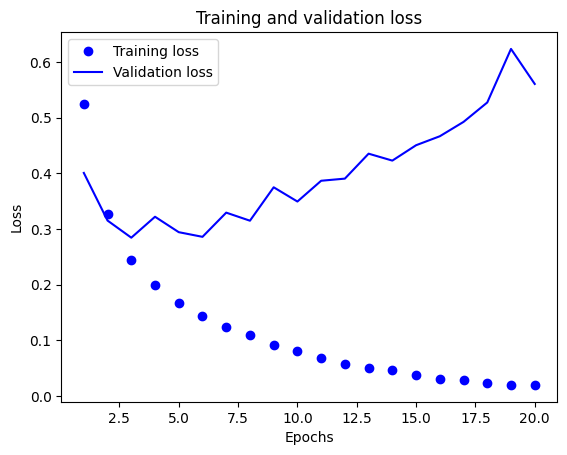

In [30]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc'] # Get accuracy values
epochs = range(1, len(loss_values) + 1) # Use loss_values to determine the number of epochs
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Plotting the training and validation accuracy

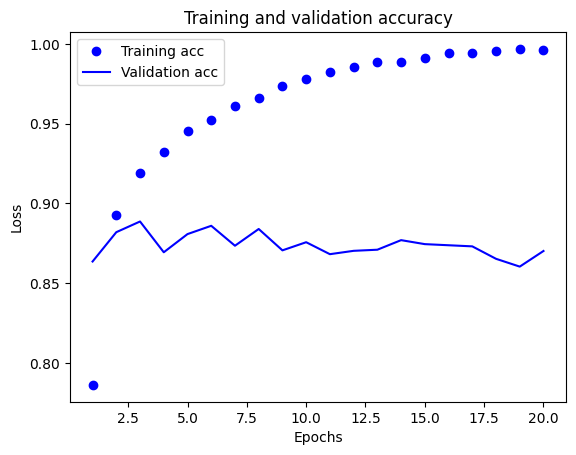

In [33]:
plt.clf() #Clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retraining a model from scratch

In [51]:
# Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.
# Try using the mse loss function instead of binary_crossentropy.
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7238 - loss: 0.5671
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9011 - loss: 0.2893
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9261 - loss: 0.2104
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9418 - loss: 0.1726


Test the model

In [49]:
results = model.evaluate(x_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8794 - loss: 0.3076


[0.30596601963043213, 0.8801199793815613]